# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [14]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from ml.visualization import plot_confusion_matrix, classifier_boundary

np.random.seed(0)  # Para mayor determinismo

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [15]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
dataset.describe()

# Name    Description
# TARGET  Label: 1 = client defaulted on loan - 0 = loan repaid
# LOAN    Amount of the loan request
# MORTDUE Amount due on existing mortgage -> Monto adeudado en la hipoteca existente
# VALUE   Value of current property
# YOJ     Years at present job
# DEROG   Number of major derogatory reports -> Número de informes derogados 
# DELINQ  Number of delinquent credit lines ->  Número de líneas de crédito morosas
# CLAGE   Age of oldest trade line in months
# NINQ    Number of recent credit lines
# CLNO    Number of credit lines
# DEBTINC Debt-to-income ratio
#

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.166667,19111.758360,76316.051780,107321.088457,8.900216,0.187702,0.319849,180.300783,1.128910,21.857066,34.573408
std,0.372779,11000.345961,46227.026585,56039.685066,7.552677,0.704882,0.928452,84.838308,1.664555,9.510840,9.308794
min,0.000000,1700.000000,5627.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,48984.750000,70787.250000,3.000000,0.000000,0.000000,116.970718,0.000000,16.000000,29.427210
50%,0.000000,17000.000000,67201.000000,94198.000000,7.000000,0.000000,0.000000,174.967815,1.000000,21.000000,35.363407
75%,0.000000,23900.000000,93731.500000,122976.250000,13.000000,0.000000,0.000000,232.261800,2.000000,27.000000,39.357987
max,1.000000,89800.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1) Los datos corresponden a personas que han tomado créditos hipotecarios recientemente. El objetivo es crear un modelo de puntaje crediticio, de manera de poder predecir si es conveniente o no otorgar un crédito a una nueva persona.

2) La variable objetivo es "TARGET", la cual puede adoptar dos valores: 1 si el cliente no devolvió el crédito, y 0 si el crédito fue pagado

3) Algunos de los atributos disponibles para realizar la predicción son:
- Monto total del crédito
- Monto adeudado de la hipoteca
- Valor actual de la propiedad
- Años de antiguedad en el trabajo
- Número de informes derogados
- Número de líneas de crédito morosas
- Número de líneas de crédito
- Ratio Deuda/Ingreso

4) Las variables que creo que son más importantes son el Monto total del crédito, el monto adeudado de la hipoteca, y el ratio Deuda/Ingreso.

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Reporte de clasificación para el mejor clasificador (sobre Conjunto de Entrenamiento):

              precision    recall  f1-score   support

           0       0.83      0.24      0.38      1232
           1       0.17      0.75      0.28       251

   micro avg       0.33      0.33      0.33      1483
   macro avg       0.50      0.50      0.33      1483
weighted avg       0.72      0.33      0.36      1483


Reporte de clasificación para el mejor clasificador (sobre Conjunto de Evaluación):

              precision    recall  f1-score   support

           0       0.85      0.24      0.37       313
           1       0.16      0.78      0.26        58

   micro avg       0.32      0.32      0.32       371
   macro avg       0.51      0.51      0.32       371
weighted avg       0.74      0.32      0.36       371




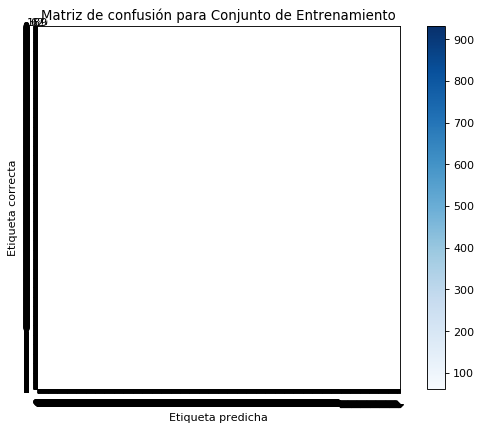

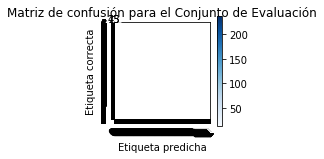

In [47]:
## Me faltaria el Accuracy y poner la semilla

plt.figure(figsize=(14, 6), dpi= 80, facecolor='w', edgecolor='k')

m = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
model.fit(X_train, y_train)


# Reporte clasificación para Conjunto Entrenamiento
print("Reporte de clasificación para el mejor clasificador (sobre Conjunto de Entrenamiento):", end="\n\n")
print(classification_report(y_train, model.predict(X_train)), end="\n\n")

# Reporte clasificación para Conjunto Evaluación
print("Reporte de clasificación para el mejor clasificador (sobre Conjunto de Evaluación):", end="\n\n")
print(classification_report(y_test, model.predict(X_test)), end="\n\n")



## Matriz de confusión para Conjunto de Entrenamiento

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                          classes=dataset.TARGET, title="Matriz de confusión para Conjunto de Entrenamiento")
plt.show()

## Matriz de confusión para Conjunto de Evaluación
plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                      classes=dataset.TARGET, title="Matriz de confusión para el Conjunto de Evaluación")
plt.show()

plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

m = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
model.fit(X_train, y_train)

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "hinge"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.705 (+/-0.057) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.830 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.823 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.822 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.817 (+/-0.001) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.698 (+/-0.070) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.575 (+/-0.091) para los parámetros {'alpha': 0.001, 'eta0': 0.01,

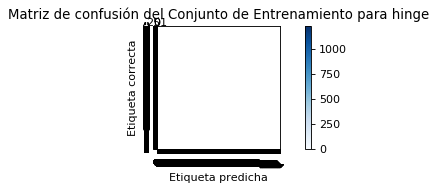

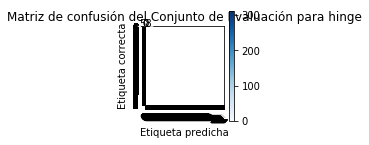

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Exploración de hiperparámetros para función de coste "log"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.682 (+/-0.067) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.658 (+/-0.066) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.807 (+/-0.002) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.829 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.635 (+/-0.069) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.813 (+/-0.000) para los parámetros {'alpha': 0.001, 'eta0': 0.01, 

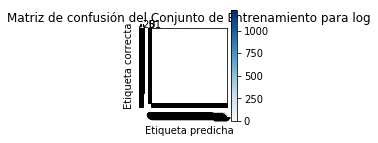

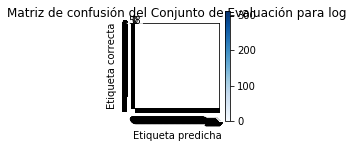

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "perceptron"

Mejor conjunto de parámetros:
{'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.701 (+/-0.068) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.692 (+/-0.067) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.820 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.689 (+/-0.065) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.811 (+/-0.001) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.800 (+/-0.004) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.698 (+/-0.070) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.001, 'eta0

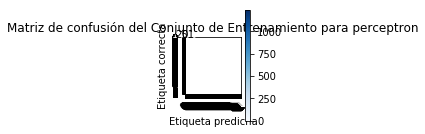

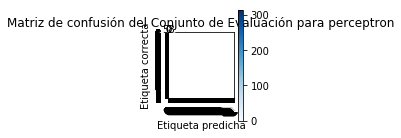

In [48]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('hinge', 'log', 'perceptron'), start=1):
    exploring_params = {
        'learning_rate': ['constant'],
        'eta0': [0.1, 0.01, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001]}  # Tasa de regularización
    
    m = SGDClassifier(loss=loss, tol=1e-3, penalty= 'l2')
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')  # cv -> CROSS VALIDATION
    model.fit(X_train, y_train)

    print("# Exploración de hiperparámetros para función de coste \"%s\"" % loss, end="\n\n")

    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    
## Reporte clasificación para Conjunto Entrenamiento
    print("Reporte de clasificación para el mejor clasificador (sobre Conjunto de Entrenamiento):", end="\n\n")
    print(classification_report(y_train, model.predict(X_train)), end="\n\n")

    print("================================================", end="\n\n")
    
    
## Reporte clasificación para Conjunto Evaluación
    print("Reporte de clasificación para el mejor clasificador (sobre Conjunto de Evaluación):", end="\n\n")
    print(classification_report(y_test, model.predict(X_test)), end="\n\n")
    

    print("================================================", end="\n\n")

    
## Matriz de Confusión para el Conjunto de Entrenamiento
    plt.subplot(2, 2, idx)
    plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                          classes=dataset.TARGET, title="Matriz de confusión del Conjunto de Entrenamiento para %s" % loss)
    plt.show()
    
## Matriz de Confusión para el Conjunto de Evaluación 
    plt.subplot(2, 2, idx)
    plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                          classes=dataset.TARGET, title="Matriz de confusión del Conjunto de Evaluación para %s" % loss)
    plt.show()


 CONCLUSIÓN -> 

El modelo lineal no me sirve para predecir los casos en que el tomador del crédito cae en default.

## Ejercicio 3: Árbol de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [52]:
from sklearn import tree

m = tree.DecisionTreeClassifier()
model = m.fit(X_train, y_train)

tree.plot_tree(model) 

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html